Bank Fraud Detection-EDA

In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from xgboost.sklearn import XGBClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import plot_importance, to_graphviz


In [6]:
df=pd.read_csv("C:/Users/AASHISH/Downloads/Dataset.csv")

In [7]:
df.drop('isFlaggedFraud',axis=1,inplace=True)

In [8]:
df.head

<bound method NDFrame.head of          step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
0             160296.36  M1979787155            0.00            0.00        0  
1              19

In [34]:
X=df.copy().drop(['isFraud','nameDest','nameOrig','type'],axis=1)
X=X.assign(errorbalanceDest=X['oldbalanceDest']+X['amount']-X['newbalanceDest'])
X=X.assign(errorbalanceOrig=X['newbalanceOrig']+X['amount']-X['oldbalanceOrg'])
y=df['isFraud']
X.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
errorbalanceDest    float64
errorbalanceOrig    float64
dtype: object

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_train.shape

(838860,)

In [36]:
weights = (y == 0).sum() / (1.0 * (y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\users\aashish\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:32:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
print(metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[209484      7]
 [     6    218]]
Accuracy: 0.9999380111103163
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.97      0.97      0.97       224

    accuracy                           1.00    209715
   macro avg       0.98      0.99      0.99    209715
weighted avg       1.00      1.00      1.00    209715

0.9999380111103163


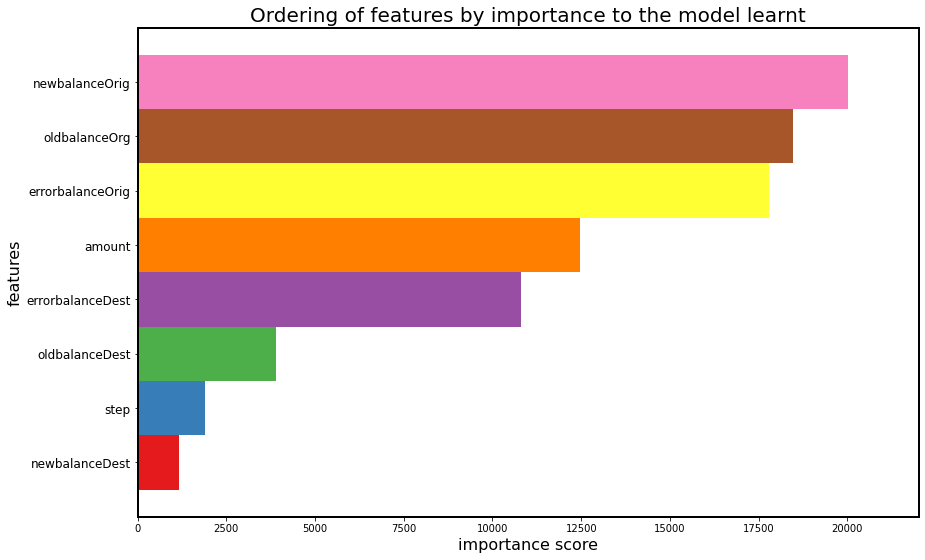

In [39]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);